In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import re
import seaborn as sns
from sklearn.cluster import KMeans

Importing the dataset

In [3]:
df = pd.read_csv('D:\PROGRAMMING\Programming_Python\Devtown\Machine Learning\Clustering\Mall_Customers.csv')


Data analysis

In [4]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [5]:
df.tail()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18
199,200,Male,30,137,83


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [ ]:
df.shape
# if we have low amount of datapoints
# How can we enlarge the present datapaoints to train our model 

(200, 5)

In [10]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


Conclusions
1. Avg. age of customer is 39
2. Customer visiting the mall is having the age between 18 to 70 
3. Having the Avg. annual income as 60k$

C:\Users\Vipul\AppData\Local\Temp\ipykernel_5408\1713822523.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Age',palette=sns.color_palette("hsv", len(df['Age'].unique())))


<Axes: xlabel='Age', ylabel='count'>

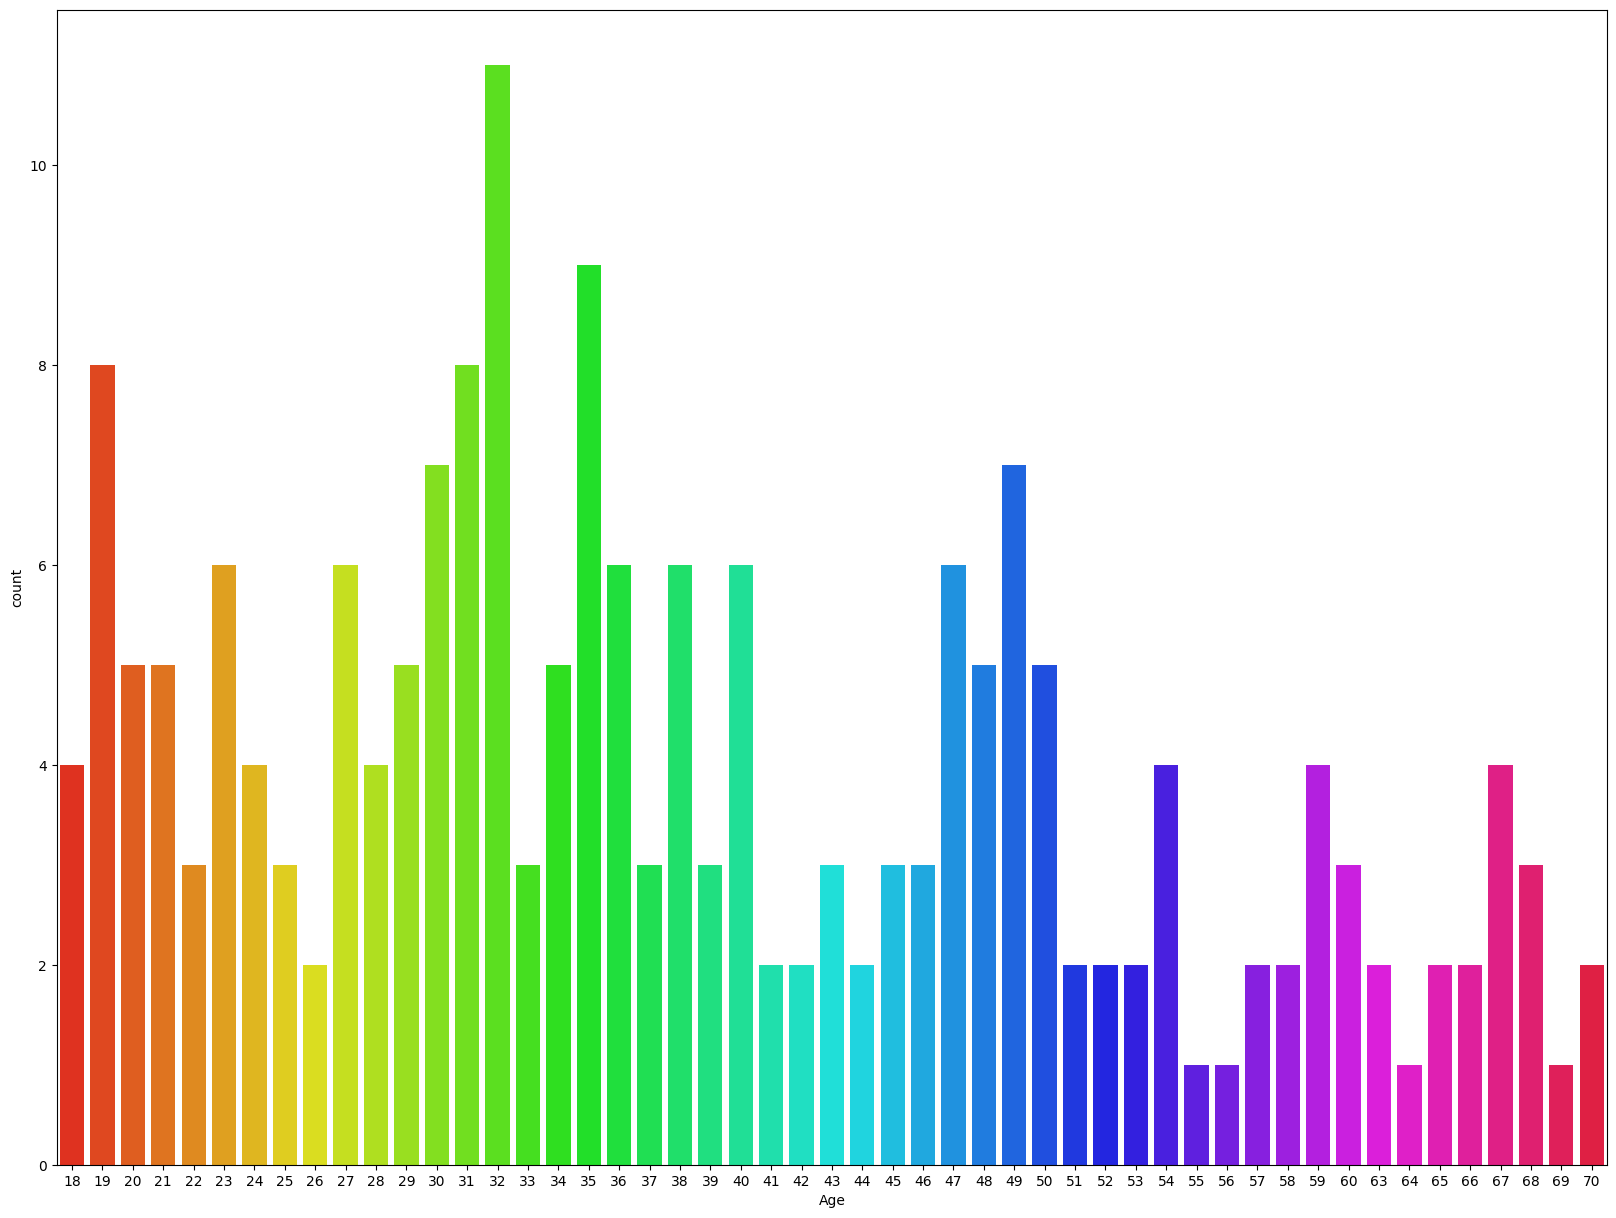

In [16]:
plt.figure(figsize=(20,15))
sns.countplot(data=df, x='Age',palette=sns.color_palette("hsv", len(df['Age'].unique())))

- show how many % of male and female visits the mall with the help of a plot

In [22]:
print(df['Gender'].value_counts())
arr = [(200/112)*100, (200/88)*100]

Gender
Female    112
Male       88
Name: count, dtype: int64


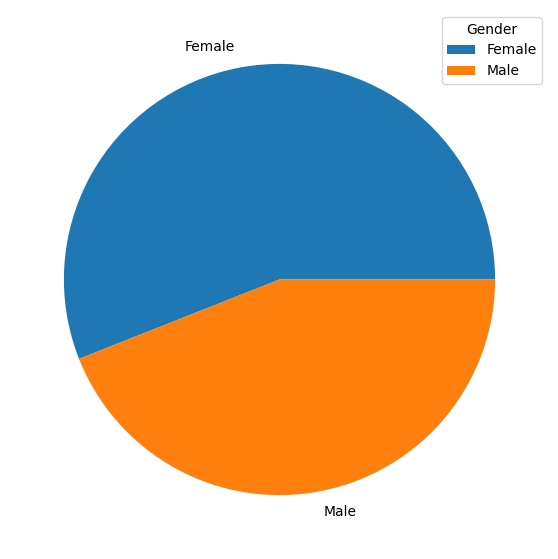

In [27]:
plt.figure(figsize=(7,7))
# plt.pie(arr,labels=["Female","Male"])
plt.pie(df['Gender'].value_counts(),labels=["Female","Male"])
plt.legend(title = "Gender")

<Axes: ylabel='count'>

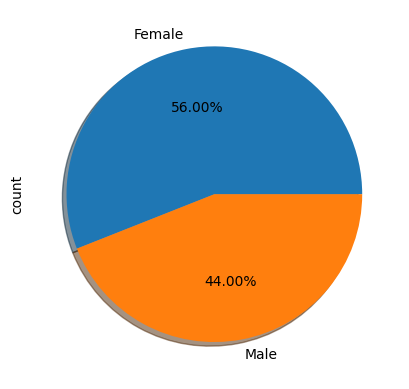

In [29]:
df.Gender.value_counts().plot(kind='pie', autopct = '%.2f%%', shadow = True)

- **Conclusion**
1. No. of Female> male
2. Female are 12% more than male
3. Female visit the mall most of the times

**Distribution of Income**

C:\Users\Vipul\AppData\Local\Temp\ipykernel_5408\3587750112.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x = df['Annual Income (k$)'],palette=sns.color_palette("hsv", len(df['Age'].unique())))
C:\Users\Vipul\AppData\Local\Temp\ipykernel_5408\3587750112.py:2: UserWarning: 
The palette list has fewer values (51) than needed (64) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(data=df, x = df['Annual Income (k$)'],palette=sns.color_palette("hsv", len(df['Age'].unique())))


Text(0.5, 1.0, 'Distribution of annual Income')

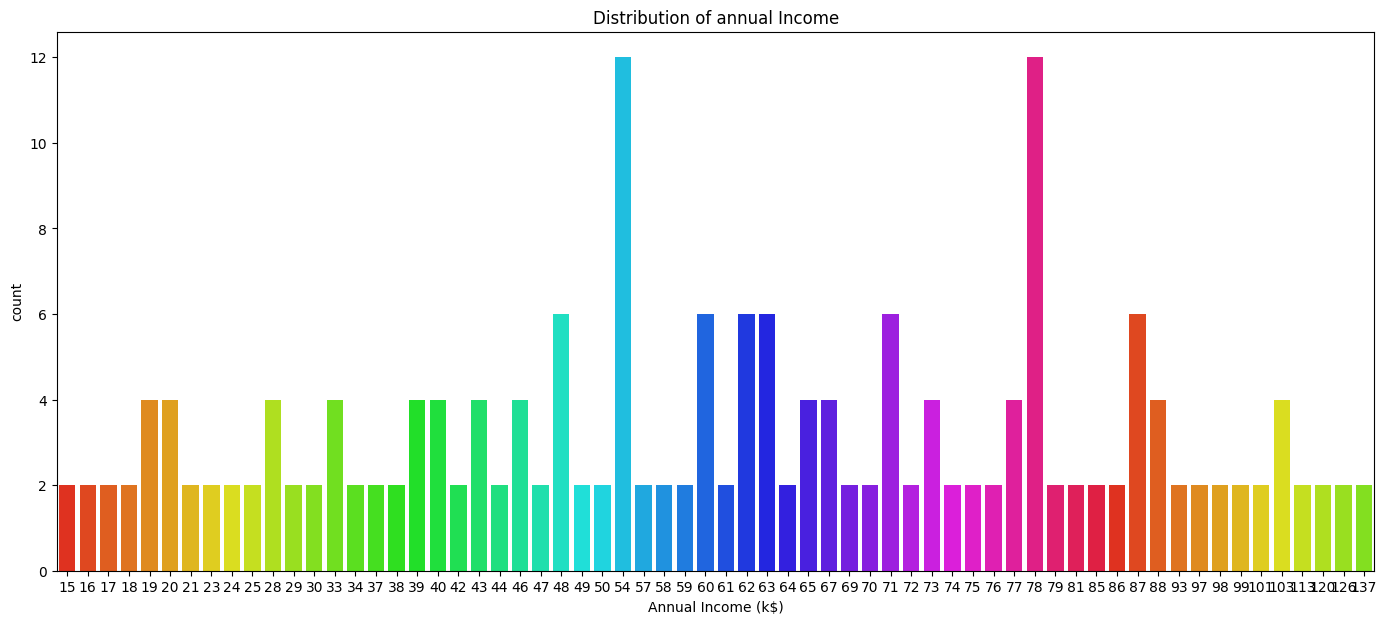

In [37]:
plt.figure(figsize=(17,7))
sns.countplot(data=df, x = df['Annual Income (k$)'],palette=sns.color_palette("hsv", len(df['Age'].unique())))
plt.title('Distribution of annual Income')

- Colclusion
1. The customer that are having the salary of 54 and 78 , visits the mall most of the times

- plot annual income distribustion W.R.T the male and female

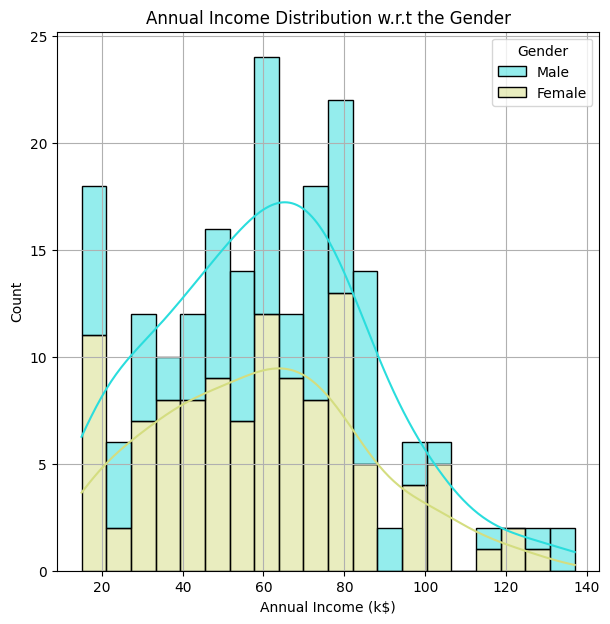

In [61]:
plt.figure(figsize=(7,7))
sns.histplot(data=df, x='Annual Income (k$)', hue='Gender', bins=20, kde=True,palette='rainbow', multiple='stack')
plt.title('Annual Income Distribution w.r.t the Gender')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Count')
plt.grid()
plt.show()

- Conclude 
1. though the male annual income is more the spending of female is more

**Seaborn lmplot**

In [62]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


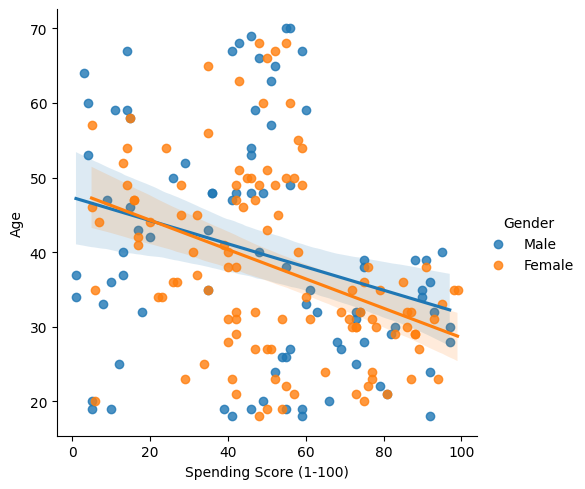

In [63]:
sns.lmplot(df,x='Spending Score (1-100)',y='Age',hue='Gender')

In [64]:
#label encoding
from sklearn.preprocessing import LabelEncoder

In [66]:
enc = LabelEncoder()

In [67]:
df.Gender = enc.fit_transform(df.Gender)

In [68]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40


In [70]:
df.drop('CustomerID',axis=1, inplace=True)

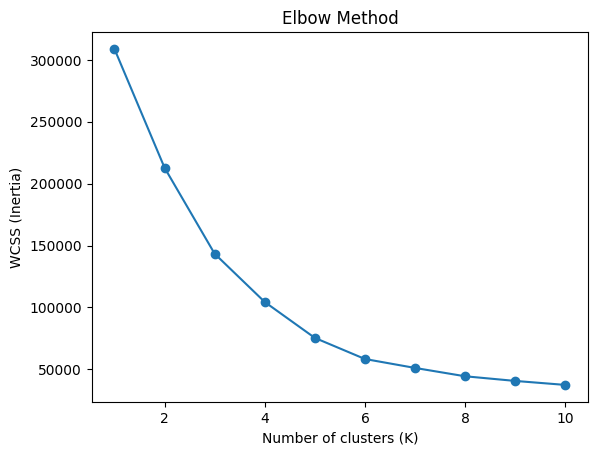

In [72]:
inertia =[]
for i in range (1,11):
    Kmodel = KMeans(n_clusters=i, n_init=15, max_iter=500)
    Kmodel.fit(df)
    inertia.append(Kmodel.inertia_)
plt.plot(range(1,11), inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of clusters (K)")
plt.ylabel("WCSS (Inertia)")
plt.show()

In [79]:
# let the value of k=6
# Initialize model
kmeans = KMeans(n_clusters=6, random_state=0)

# Fit model
kmeans.fit(df)

# Get cluster labels and centroids
y_kmeans = kmeans.predict(df)
centroids = kmeans.cluster_centers_

In [80]:
y_kmeans

array([2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5,
       2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 2, 5, 0, 5, 2, 5,
       2, 5, 0, 4, 4, 4, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 0, 4, 0, 0, 0, 4,
       0, 0, 4, 4, 0, 0, 0, 0, 0, 4, 0, 4, 4, 0, 0, 4, 0, 0, 4, 0, 0, 4,
       4, 0, 0, 4, 0, 4, 4, 4, 0, 4, 0, 4, 4, 0, 0, 4, 0, 4, 0, 0, 0, 0,
       0, 4, 4, 4, 4, 4, 0, 0, 0, 0, 4, 4, 4, 1, 4, 1, 4, 1, 3, 1, 3, 1,
       4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 4, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1, 3, 1,
       3, 1], dtype=int32)

In [86]:
sns.color_palette(None,len(np.unique(y_kmeans)))

[(0.12156862745098039, 0.4666666666666667, 0.7058823529411765),
 (1.0, 0.4980392156862745, 0.054901960784313725),
 (0.17254901960784313, 0.6274509803921569, 0.17254901960784313),
 (0.8392156862745098, 0.15294117647058825, 0.1568627450980392),
 (0.5803921568627451, 0.403921568627451, 0.7411764705882353),
 (0.5490196078431373, 0.33725490196078434, 0.29411764705882354)]

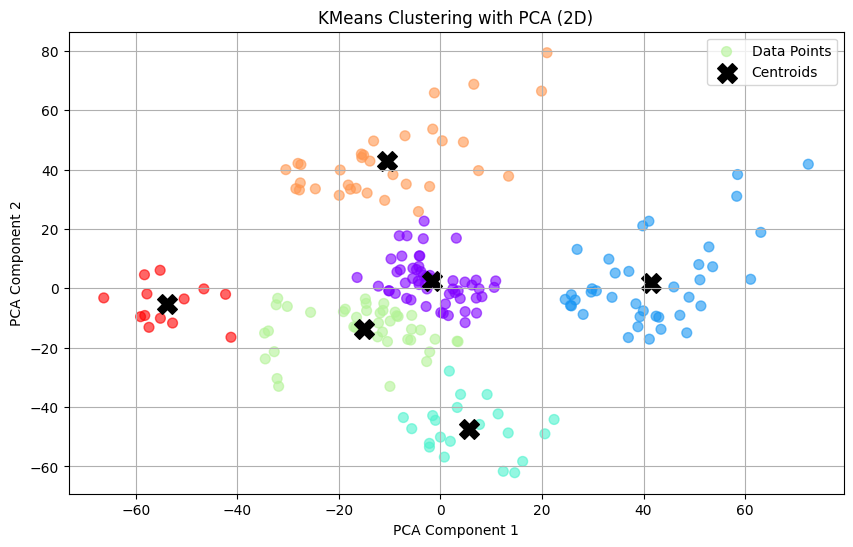

In [87]:
from sklearn.decomposition import PCA

# Load your DataFrame (example assumes you already have df)
# df = pd.read_csv('your_file.csv')

# Step 1: Apply PCA to reduce to 2D
pca = PCA(n_components=2)
df_pca = pca.fit_transform(df)  # df must be numeric only

# Step 2: Run KMeans on original or reduced data (your choice)
kmeans = KMeans(n_clusters=6, random_state=0)
y_kmeans = kmeans.fit_predict(df_pca)
centroids = kmeans.cluster_centers_

# Step 3: Plot
plt.figure(figsize=(10, 6))
plt.scatter(df_pca[:, 0], df_pca[:, 1], c=y_kmeans, cmap='rainbow', s=50, alpha=0.6, label='Data Points')
plt.scatter(centroids[:, 0], centroids[:, 1], c='black', s=200, marker='X', label='Centroids')
plt.title("KMeans Clustering with PCA (2D)")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.legend()
plt.grid(True)
plt.show()

In [89]:
df['Cluster/Group'] = y_kmeans

In [90]:
df.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100),Cluster/Group
0,1,19,15,39,3
1,1,21,15,81,2
2,0,20,16,6,5
3,0,23,16,77,2
4,0,31,17,40,3
